![alt text](https://engmrk.com/wp-content/uploads/2018/09/LeNet_Original_Image.jpg)

![alt text](https://engmrk.com/wp-content/uploads/2018/09/LeNEt_Summary_Table.jpg)

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
import torchvision.datasets

In [3]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)


In [4]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

D:\hran\anacondas\Lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
D:\hran\anacondas\Lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
D:\hran\anacondas\Lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
D:\hran\anacondas\Lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [5]:
len(y_train), len(y_test)

(60000, 10000)

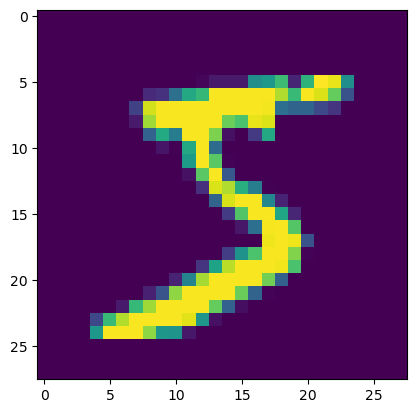

tensor(5)


In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [7]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [8]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [9]:
class MNIST_model(nn.Module):
    def __init__(self):
        super(MNIST_model, self).__init__()
        self.clayer1 = nn.Sequential(nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
                                     nn.LeakyReLU(),
                                     nn.MaxPool2d(kernel_size=2, stride=2)
                                     )
        self.clayer2 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
                                     nn.LeakyReLU(),
                                     nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc1 = nn.Linear(64 * 7 * 7, 1024)
        self.ac1 = torch.nn.LeakyReLU()
        self.fc2 = torch.nn.Linear(1024, 256)
        self.ac2 = torch.nn.LeakyReLU()
        self.fc3 = torch.nn.Linear(256, 10)
    def forward(self, x):
        x = self.clayer1(x)
        x = self.clayer2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        return x
    def inference(self, x):
        x = self.forward(x)
        return nn.Softmax(x)
lenet5 = MNIST_model()

In [10]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [11]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [12]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)

tensor(0.9813)
tensor(0.9849)
tensor(0.9871)
tensor(0.9899)
tensor(0.9868)
tensor(0.9836)
tensor(0.9892)
tensor(0.9850)
tensor(0.9896)
tensor(0.9881)
tensor(0.9846)
tensor(0.9883)
tensor(0.9811)


KeyboardInterrupt: 

In [13]:
lenet5.forward(X_test).argmax(dim=1)

tensor([7, 2, 1,  ..., 4, 5, 6], device='cuda:0')

In [14]:
for i in test_preds.argmax(dim=1):
    print(i)

tensor(7, device='cuda:0')
tensor(2, device='cuda:0')
tensor(1, device='cuda:0')
tensor(0, device='cuda:0')
tensor(4, device='cuda:0')
tensor(1, device='cuda:0')
tensor(4, device='cuda:0')
tensor(9, device='cuda:0')
tensor(5, device='cuda:0')
tensor(9, device='cuda:0')
tensor(0, device='cuda:0')
tensor(6, device='cuda:0')
tensor(9, device='cuda:0')
tensor(0, device='cuda:0')
tensor(1, device='cuda:0')
tensor(5, device='cuda:0')
tensor(9, device='cuda:0')
tensor(7, device='cuda:0')
tensor(5, device='cuda:0')
tensor(4, device='cuda:0')
tensor(9, device='cuda:0')
tensor(6, device='cuda:0')
tensor(6, device='cuda:0')
tensor(5, device='cuda:0')
tensor(4, device='cuda:0')
tensor(0, device='cuda:0')
tensor(7, device='cuda:0')
tensor(4, device='cuda:0')
tensor(0, device='cuda:0')
tensor(1, device='cuda:0')
tensor(3, device='cuda:0')
tensor(1, device='cuda:0')
tensor(3, device='cuda:0')
tensor(4, device='cuda:0')
tensor(7, device='cuda:0')
tensor(2, device='cuda:0')
tensor(7, device='cuda:0')
t

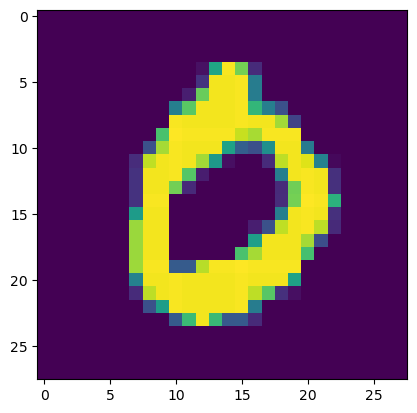

In [17]:
plt.imshow(X_test[3].cpu().numpy().transpose((1, 2, 0)))

In [ ]:
# plt.plot(test_accuracy_history);
plt.plot(test_loss_history);